# The following codes are inspired by:
    
https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb

http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

*In the following codes*, we will know:
1. how to deal with cvs file and find out available feature (data preparation), and
2. how to present the necessary feature generally and in details (data visualization).
    

# Import Packages

In [61]:
#import essential packages to deal with
#1. plot and figures
import matplotlib.pyplot as plt
#2. math
import numpy as np
#3. series, csv file
import pandas as pd

# Read excell file

In [62]:
# read data using pandas,
########################################
##path of a csv file
#url = "https://your_path"
##list that contains fields names
#names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarke']

# Or, Load train_titanic.csv to your PC, then read it
df = pd.read_csv("train_titanic.csv")

# Data Preparation

In [63]:
# necessary code to discover our data
########################################
## know the type of df
print("df type is:",type(df)) #the data set is a frame

## get the number of rows(instances) and columns(attributes, feature, variables, fields)
print("df shape is:",df.shape) 
 
#to get the first n instances, we use df.head as
print("df head is:", df.head(5))

#to get the total number of elements
print("df size is:", df.size)

#to get the distict types of a filed, and the size of each distinct value
#note: we use groupby over an attribute as sql,Or value_counts() function

print("___ groupby implementation on Survived feature_____")
print(df.groupby(df['Survived']).size()) #use Survived feature to know how many people are survived (survived=1) or died (survived=0) 
#Or
print("___ value_counts implementation on Survived feature_____")
print(df.Survived.value_counts().sort_index())

#get the name of features, attributes
print("df columns is:",df.columns)

#to drop unneeded features:
#'Ticket','Cabin' because they contain a lot of NaN values
#'Name' because it is unnecesary when we apply classification or regression algorithms
df = df.drop(['Ticket','Cabin','Name'], axis=1)

#create numerical input for Sex field as; male=1, female=0
df.loc[("male" == df.Sex), "Sex"] = 1
df.loc[("female" == df.Sex), "Sex"] = 0

#create numerical input for Embarked field as, C=1, Q=2, S=3
df.loc[("C" == df.Embarked), "Embarked"] = 1
df.loc[("Q" == df.Embarked), "Embarked"] = 2
df.loc[("S" == df.Embarked), "Embarked"] = 3

#to get statistical summary on each attribute (column, field, variable), use df.describe
#statistical summary= count, mean, std, min, max, 25% percentile, 50% percentile and 75% percentile
print(df.describe())

#to drop the Nan values 
df=df.dropna()

#cast to integer, to be recognized as numerical feature
df['Embarked'] = df['Embarked'].astype(int)
df['Sex'] = df['Sex'].astype(int)


print("__ df after dropping Ticket,Cabin, and Name and changing Sex, Embarked to numbers, and drop NaN values _____")
print(df.head(10))


df type is: <class 'pandas.core.frame.DataFrame'>
df shape is: (891, 12)
df head is:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113

# Data visualization in general

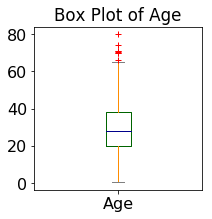

In [64]:
##########################################################
##############       BOX             #####################
##########################################################
# use box plot for the Age feature
#fig=plt.figure(figsize=(18,6))

df_age = df.drop(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Fare', 'Embarked'], axis=1)
my_color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
ax1=df_age.plot(kind='box', color=my_color,sym='r+',vert=True,title="Box Plot of Age",figsize=(3,3),fontsize=16)

plt.show()

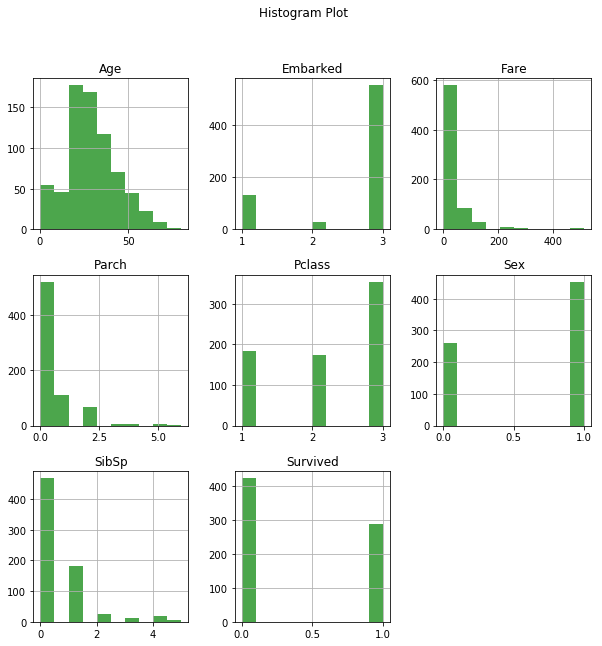

In [5]:
##########################################################
##############      Histograms       #####################
##########################################################
#create a histogram of each input variable to get an idea of the distribution
df_non_ID = df.drop(['PassengerId'], axis=1)
import pylab as pl
ax2=df_non_ID.hist( sharey=False,sharex=False, alpha=.7,color='green',figsize=(10,10))
pl.suptitle("Histogram Plot")
plt.rcParams.update({'font.size': 14})

plt.show()

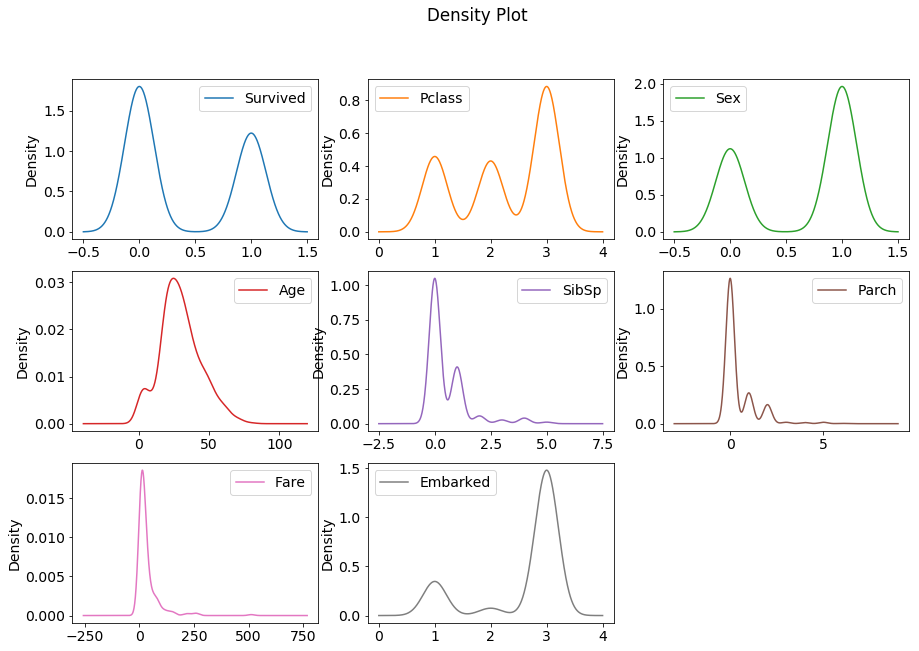

In [16]:
##########################################################
##############       density         #####################
##########################################################
#Density plots are another way of getting an idea of the distribution of each attribute. 
ax3=df_non_ID.plot(kind='density', subplots=True, layout=(3,3), sharex=False,title="Density Plot",figsize=(15,10))

plt.show()

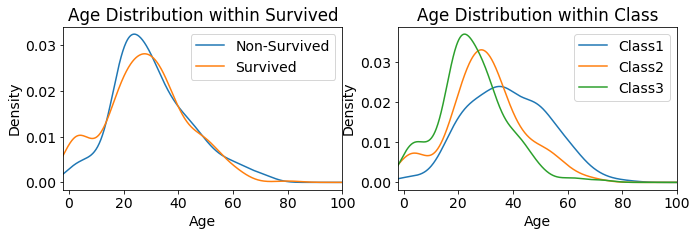

In [259]:
##########################################################
####      density on the same graph, using plt    ########
##########################################################
# Age distribution with respect to Survived 
fig = plt.figure(figsize=(11,3))
ax4 = fig.add_subplot(1,2,1)
df_non_ID.Age[df_non_ID['Survived']==0].plot(kind='kde')
df_non_ID.Age[df_non_ID['Survived']==1].plot(kind='kde')
ax4.set_xlim([-2, 100])
ax4.legend(('Non-Survived', 'Survived'),loc='best')
ax4.set_xlabel('Age')
ax4.set_title("Age Distribution within Survived")

# Age distribution with respect to Pclass
ax5 = fig.add_subplot(1,2,2)
df_non_ID.Age[df_non_ID['Pclass']==1].plot(kind='kde')
df_non_ID.Age[df_non_ID['Pclass']==2].plot(kind='kde')
df_non_ID.Age[df_non_ID['Pclass']==3].plot(kind='kde')
ax5.set_xlim([-2, 100])
ax5.legend(('Class1', 'Class2','Class3'),loc='best')
ax5.set_xlabel('Age')
ax5.set_title("Age Distribution within Class")

plt.show()

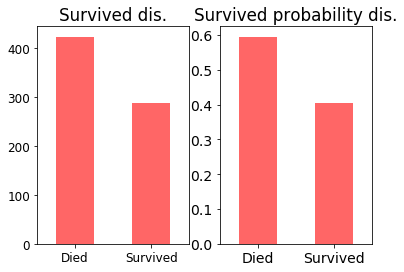

In [11]:
##########################################################
############            Bar          #####################
##########################################################
#use bar plot to draw the distribution of Survived

fig = plt.figure()
ax6 = fig.add_subplot(1,2,1)
df.Survived.value_counts().sort_index().plot(kind='bar', alpha=.6,color='red',fontsize=12, figsize=(6, 4),title="Survived dis.")
ax6.set_xticklabels(["Died","Survived"], rotation=0)

ax7 = fig.add_subplot(1,2,2)
(df.Survived.value_counts().sort_index()/float(df.groupby('Survived').size().sum())).plot(kind='bar', alpha=.6,color='red',fontsize=14, figsize=(6, 4),title="Survived probability dis.")
ax7.set_xticklabels(["Died","Survived"], rotation=0)

plt.show()

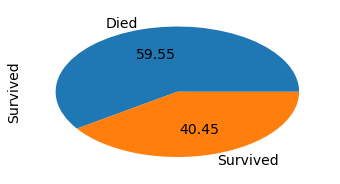

In [266]:
##########################################################
#############           pie           ####################
##########################################################
#Draw Survived distribution using pie plot
fig = plt.figure()
ax8 = fig.add_subplot(1,2,1)
Survived_dis=df.Survived.value_counts().sort_index()
(Survived_dis/float(Survived_dis.sum())).plot.pie(labels=['Died', 'Survived'],autopct='%.2f', fontsize=14, figsize=(12,3))

plt.show()

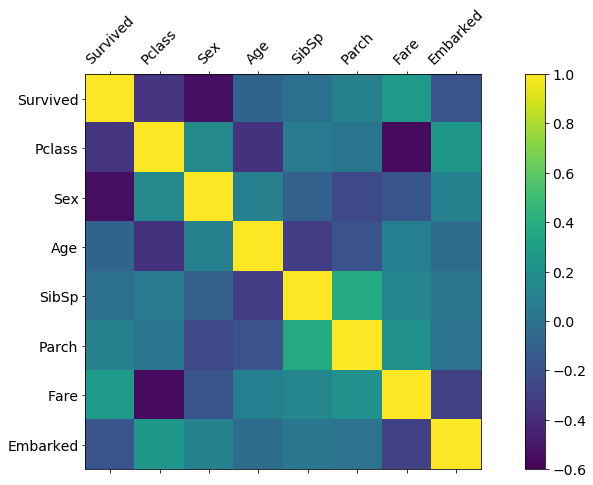

In [295]:
##########################################################
#######          Correlation Matrix         ##############
##########################################################
#using the correlation matrix, we can compute the correlation between each pair of attributes.
#Plot the correlation matrix to get an idea of which attributes have a high correlation with each other.
#when two attributes are highly correlated, then we get diagonale line in the two attributes dimensions.

correlations = df_non_ID.corr()
fig = plt.figure(figsize=(16,16))

ax9 = fig.add_subplot(211)
cax = ax9.matshow(correlations, vmin=-0.6, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1) #this is used to specify how many ticks we have
ax9.set_xticks(ticks)
ax9.set_yticks(ticks)
ax9.set_xticklabels(df_non_ID.columns,rotation=45)
ax9.set_yticklabels(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'])

plt.show()

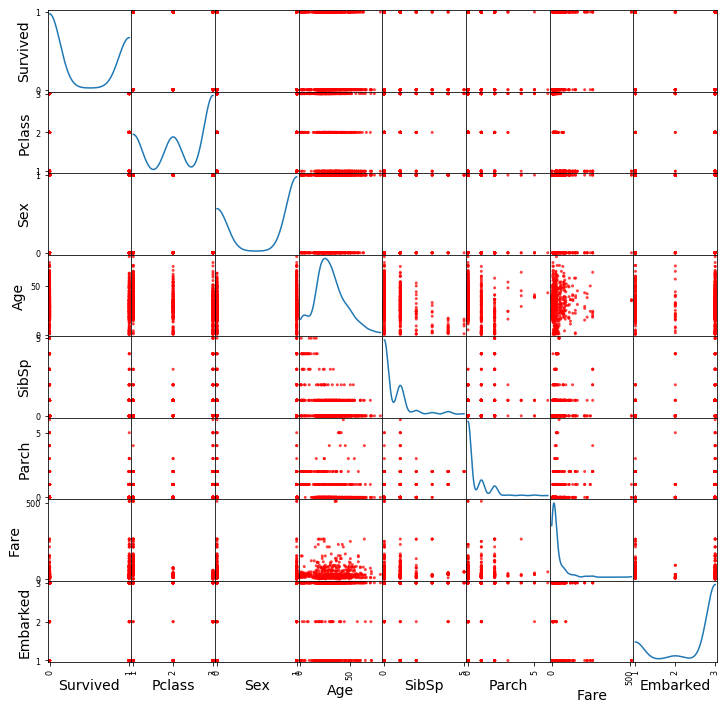

In [304]:
##########################################################
#########      Scatter  Matrix Plot     ##################
##########################################################
#import Scatter matrix
#Note, each cell in the diagonale is the density of horizontal or vertical feature
#in each cell, we draw a feature with another feature.
#when we get diagonale drawing in a cell of two feature, then the two feature are highly correlated
from pandas.plotting import scatter_matrix
scatter_matrix(df_non_ID, alpha=0.75, figsize=(12,12), diagonal='kde',color='r')

#dataset.diff().hist(color='k', alpha=0.5, bins=50)
plt.show()

# Data visualization in details

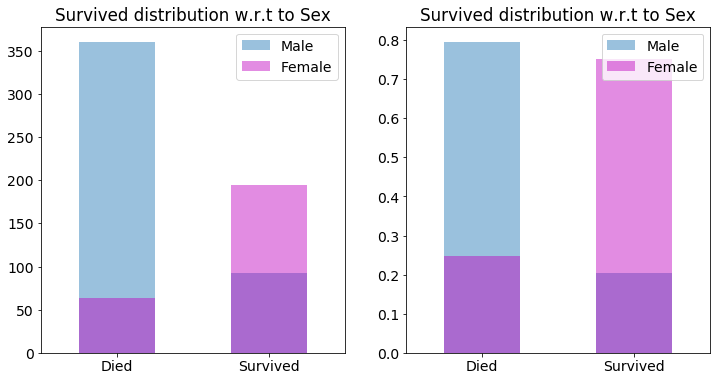

In [65]:
#draw the Survived feature distribution according to Sex feature
survived_group=df_non_ID.groupby(df_non_ID['Survived']).size()
#print(survived_group)

########### Survived distribution w.r.t Sex 
fig = plt.figure(figsize=(12,6))
ax11 = fig.add_subplot(1,2,1)
#df_female=df_non_ID.groupby(df_non_ID['Survived'][df_non_ID['Sex']==0]).size()
df_female = df_non_ID['Survived'][df_non_ID['Sex'] == 0].value_counts().sort_index()
#print(df_female)

#df_male=df_non_ID.groupby(df_non_ID['Survived'][df_non_ID['Sex']==1]).size()
df_male=df_non_ID['Survived'][df_non_ID['Sex']==1].value_counts().sort_index()
#print(df_male)

df_male.plot.bar(label='Male', alpha=0.45,title="Survived distribution w.r.t to Sex")
df_female.plot.bar(color='m',label='Female', alpha=0.45)
ax11.legend(loc='best')
ax11.set_xticklabels(["Died","Survived"], rotation=0)
 

########### Survived probability distribution w.r.t Sex     
ax12 = fig.add_subplot(1,2,2)
(df_male/float(df_male.sum())).plot.bar(label='Male', alpha=0.45,title="Survived distribution w.r.t to Sex")
(df_female/float(df_female.sum())).plot.bar(color='m',label='Female', alpha=0.45)
ax12.legend(loc='best')
ax12.set_xticklabels(["Died","Survived"], rotation=0)


plt.show()

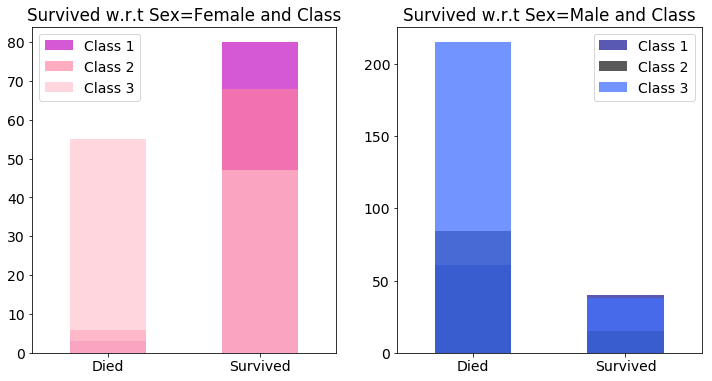

In [50]:
#draw the Survived feature distribution according to Sex and Pclass feature
fig = plt.figure(figsize=(12,6))

########### Distribution of Survived according to Gender=female and Class
ax11 = fig.add_subplot(1,2,1)
df_female = df_non_ID['Survived'][df_non_ID['Sex'] == 0].value_counts().sort_index()
df_female_class1 = df_non_ID['Survived'][df_non_ID['Sex'] == 0][df_non_ID['Pclass'] == 1].value_counts().sort_index()
df_female_class2 = df_non_ID['Survived'][df_non_ID['Sex'] == 0][df_non_ID['Pclass'] == 2].value_counts().sort_index()
df_female_class3 = df_non_ID['Survived'][df_non_ID['Sex'] == 0][df_non_ID['Pclass'] == 3].value_counts().sort_index()

df_female_class1.plot.bar(color='m',label='Female class1', alpha=0.65)
df_female_class2.plot.bar(color=(1.0,0.5,0.62),label='Female class2', alpha=0.65)
df_female_class3.plot.bar(color='pink',label='Female class3', alpha=0.65,title='Survived w.r.t Sex=Female and Class')
ax11.legend(loc='best')
ax11.set_xticklabels(["Died","Survived"], rotation=0)
ax11.legend(('Class 1', 'Class 2','Class 3'),loc='best')


########### Distribution of Survived according to Gender=female and Class
ax12 = fig.add_subplot(1,2,2)
df_male = df_non_ID['Survived'][df_non_ID['Sex'] == 1].value_counts().sort_index()
df_male_class1 = df_non_ID['Survived'][df_non_ID['Sex'] == 1][df_non_ID['Pclass'] == 1].value_counts().sort_index()
df_male_class2 = df_non_ID['Survived'][df_non_ID['Sex'] == 1][df_non_ID['Pclass'] == 2].value_counts().sort_index()
df_male_class3 = df_non_ID['Survived'][df_non_ID['Sex'] == 1][df_non_ID['Pclass'] == 3].value_counts().sort_index()

df_male_class1.plot.bar(color='darkblue',label='Male class1', alpha=0.65)
df_male_class2.plot.bar(color='k',label='Male class2', alpha=0.65)
df_male_class3.plot.bar(color=(0.2588,0.4433,1.0),label='Male class3', alpha=0.75,title='Survived w.r.t Sex=Male and Class')
ax12.legend(loc='best')
ax12.set_xticklabels(["Died","Survived"], rotation=0)
ax12.legend(('Class 1', 'Class 2','Class 3'),loc='best')

      
plt.show()